### Import Dataset 

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [48]:
df = pd.read_csv("dataset.csv")
df.head()

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
0,2562691,663791,168,MPD,Dhaka,android,normal,25.0,6/26/2019 9:20,6/26/2019 3:30,No,Yes,NaN,No
1,2561859,961083,240,MPD,Dhaka,mobile-site,normal,35.0,6/25/2019 19:05,6/25/2019 13:40,No,Yes,NaN,No
2,2561434,848517,120,MPD,Dhaka,desktop,normal,35.0,6/25/2019 15:28,6/25/2019 9:27,No,Yes,NaN,Yes
3,2561202,276304,185,MPD,Dhaka,android,normal,25.0,6/25/2019 13:27,6/25/2019 7:27,Yes,No,NaN,No
4,2561033,955384,201,MPD,Dhaka,android,normal,25.0,6/25/2019 12:13,6/25/2019 6:56,No,Yes,NaN,No


### Display summary statistics of the dataset

In [49]:

df.describe()


,OrderId,UserId,OrderValue,DeliveryCharge,courierService
count,1.000000e+04,10000.000000,10000.00000,9999.000000,0.0
mean,2.539235e+06,760484.345100,336.97160,33.782678,NaN
std,9.560667e+03,244170.093658,435.38002,24.795291,NaN
min,2.522672e+06,83.000000,0.00000,0.000000,NaN
25%,2.531893e+06,616375.750000,160.00000,25.000000,NaN
50%,2.538966e+06,883312.000000,230.00000,25.000000,NaN
75%,2.546397e+06,950553.000000,386.25000,55.000000,NaN
max,2.562691e+06,961083.000000,12800.00000,500.000000,NaN


### Checking Missing Values and Showing the target variable


Missing Values:
OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

Distribution of isRTO:
isRTO
No     8465
Yes    1535
Name: count, dtype: int64

Percentage Distribution:
isRTO
No     84.65
Yes    15.35
Name: proportion, dtype: float64


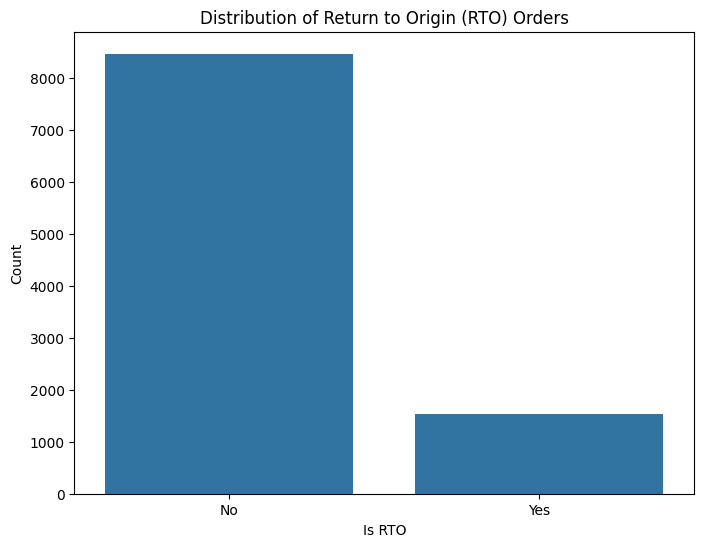

In [50]:
print("\nMissing Values:")
print(df.isnull().sum())

print("\nDistribution of isRTO:")
print(df['isRTO'].value_counts())
print("\nPercentage Distribution:")
print(df['isRTO'].value_counts(normalize=True).mul(100).round(2))

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='isRTO')
plt.title('Distribution of Return to Origin (RTO) Orders')
plt.xlabel('Is RTO')
plt.ylabel('Count')
plt.show()


### Plot 2 Numerical & 2 Categorical values

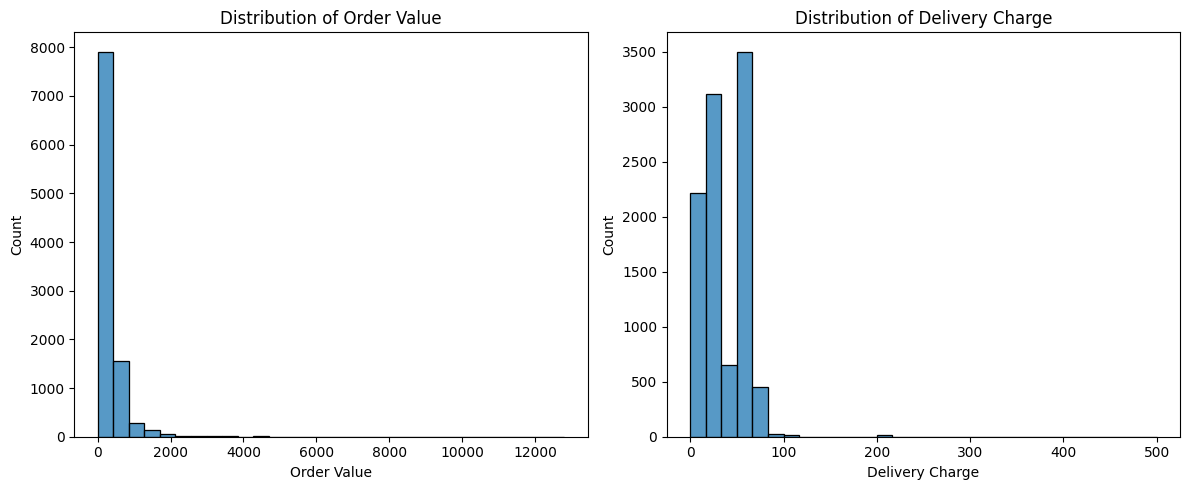

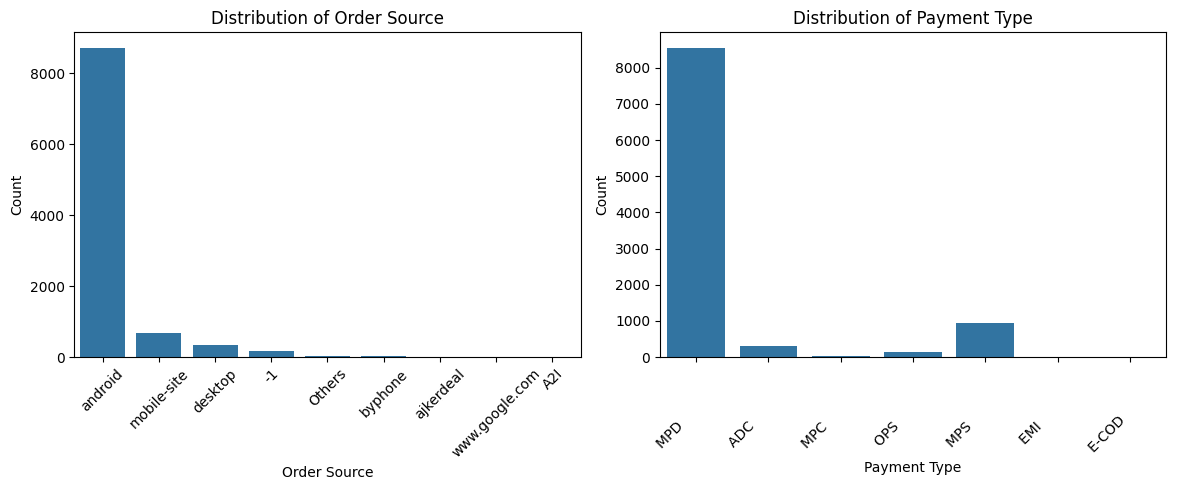

In [51]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='OrderValue', bins=30)
plt.title('Distribution of Order Value')
plt.xlabel('Order Value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='DeliveryCharge', bins=30)
plt.title('Distribution of Delivery Charge')
plt.xlabel('Delivery Charge')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='OrderSource')
plt.title('Distribution of Order Source')
plt.xlabel('Order Source')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='PaymentType')
plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Correlation Matrix (Heatmap)

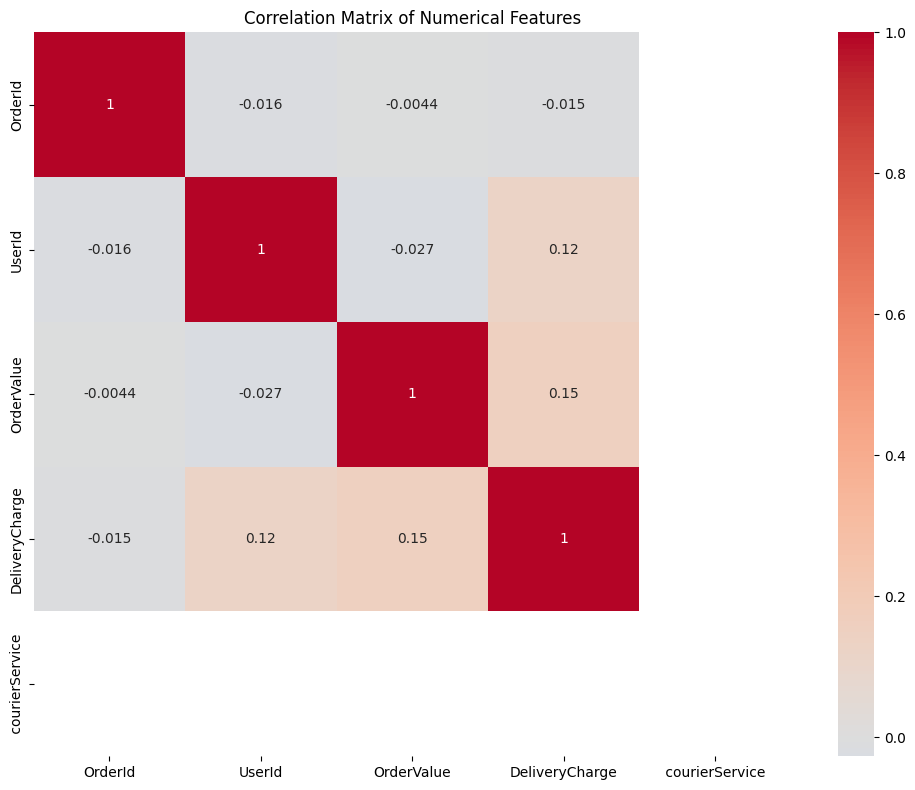

In [52]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


### Data Preprocessing

(A) Handle missing values appropriately

In [53]:

print("Missing values in each column:")
print(df.isnull().sum())
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)


df.loc[:, 'DeliveryCharge'] = df['DeliveryCharge'].fillna(df['DeliveryCharge'].median())


columns_to_keep = [col for col in df.columns if col != 'courierService']
df = df[columns_to_keep]

print("\nRemaining missing values after handling:")
print(df.isnull().sum())



Missing values in each column:
OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

Percentage of missing values:
OrderId                        0.00
UserId                         0.00
OrderValue                     0.00
PaymentType                    0.00
District                       0.00
OrderSource                    0.00
OrderType                      4.17
DeliveryCharge                 0.01
OrderPlacedDay                 0.00
OrderConfirmDayOverPhone       0.00
IsCartOrder                    0.00
OrderFromPromotionalEvent      0.00
 co

(B) One Hot Encoding

In [54]:

categorical_cols = ['PaymentType', 'District', 'OrderSource', 'OrderType',
                   'IsCartOrder', 'OrderFromPromotionalEvent', 'isRTO']

df_encoded = pd.get_dummies(df, columns=categorical_cols)

df_encoded['OrderPlacedDay'] = pd.to_datetime(df_encoded['OrderPlacedDay'])
df_encoded['OrderConfirmDayOverPhone'] = pd.to_datetime(df_encoded['OrderConfirmDayOverPhone'])

df_encoded['OrderPlacedHour'] = df_encoded['OrderPlacedDay'].dt.hour
df_encoded['OrderPlacedDayOfWeek'] = df_encoded['OrderPlacedDay'].dt.dayofweek
df_encoded['OrderConfirmHour'] = df_encoded['OrderConfirmDayOverPhone'].dt.hour
df_encoded['OrderConfirmDayOfWeek'] = df_encoded['OrderConfirmDayOverPhone'].dt.dayofweek
df_encoded['ProcessingTimeHours'] = (df_encoded['OrderConfirmDayOverPhone'] - df_encoded['OrderPlacedDay']).dt.total_seconds() / 3600

df_encoded.drop(['OrderPlacedDay', 'OrderConfirmDayOverPhone'], axis=1, inplace=True)

print("\nShape of encoded data:", df_encoded.shape)
print("\nColumns after encoding:", df_encoded.columns.tolist())



Shape of encoded data: (10000, 103)

Columns after encoding: ['OrderId', 'UserId', 'OrderValue', 'DeliveryCharge', ' courierService ', 'PaymentType_ADC                 ', 'PaymentType_E-COD               ', 'PaymentType_EMI                 ', 'PaymentType_MPC                 ', 'PaymentType_MPD                 ', 'PaymentType_MPS                 ', 'PaymentType_OPS                 ', 'District_Bagerhat', 'District_Bandarban', 'District_Barguna', 'District_Barisal', 'District_Bhola', 'District_Bogra', 'District_Brahmanbaria', 'District_Chandpur', 'District_Chapai-Nawabganj', 'District_Chittagong (Outside City)', 'District_Chittagong City', 'District_Chuadanga', 'District_Comilla', "District_Cox's-Bazar", 'District_Dhaka', 'District_Dhaka (Outside City)', 'District_Dinajpur', 'District_Faridpur', 'District_Feni', 'District_Gaibandha', 'District_Gazipur', 'District_Gopalganj', 'District_Habiganj', 'District_Jamalpur', 'District_Jessore', 'District_Jhalokati', 'District_Jhenaidah', 'Distr

(C) Standardize

In [55]:
# Identify numerical columns for scaling
numerical_cols = ['OrderValue', 'DeliveryCharge', 'OrderPlacedHour', 'OrderPlacedDayOfWeek',
                 'OrderConfirmHour', 'OrderConfirmDayOfWeek', 'ProcessingTimeHours']

# Initialize StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale numerical features
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("\nNumerical features have been standardized.")
print("Mean of scaled features:")
print(df_encoded[numerical_cols].mean().round(2))
print("\nStandard deviation of scaled features:")
print(df_encoded[numerical_cols].std().round(2))



Numerical features have been standardized.
Mean of scaled features:
OrderValue              -0.0
DeliveryCharge           0.0
OrderPlacedHour          0.0
OrderPlacedDayOfWeek     0.0
OrderConfirmHour         0.0
OrderConfirmDayOfWeek    0.0
ProcessingTimeHours      0.0
dtype: float64

Standard deviation of scaled features:
OrderValue               1.0
DeliveryCharge           1.0
OrderPlacedHour          1.0
OrderPlacedDayOfWeek     1.0
OrderConfirmHour         1.0
OrderConfirmDayOfWeek    1.0
ProcessingTimeHours      1.0
dtype: float64


(D) Split the dataset

In [56]:
# Split the data into features (X) and target (y)
X = df_encoded.drop(['isRTO_No', 'isRTO_Yes'], axis=1)
y = df_encoded['isRTO_Yes']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (8000, 101)
Testing set shape: (2000, 101)


### Feature Engineering

(A) Creating 2 new features

In [57]:
# 1. Create a feature for total cost (OrderValue + DeliveryCharge)
# This could help identify if customers are more likely to return orders with higher total costs
X_train['TotalCost'] = X_train['OrderValue'] + X_train['DeliveryCharge'] 
X_test['TotalCost'] = X_test['OrderValue'] + X_test['DeliveryCharge']

# Scale the new TotalCost feature
scaler = StandardScaler()
X_train['TotalCost'] = scaler.fit_transform(X_train[['TotalCost']])
X_test['TotalCost'] = scaler.transform(X_test[['TotalCost']])

# 2. Create a feature for processing time vs order value ratio
# This could help identify if rushed/delayed orders relative to their value are more likely to be returned
X_train['ProcessingTimePerValue'] = X_train['ProcessingTimeHours'] / (X_train['OrderValue'] + 1) # Adding 1 to avoid division by zero
X_test['ProcessingTimePerValue'] = X_test['ProcessingTimeHours'] / (X_test['OrderValue'] + 1)

# Scale the ProcessingTimePerValue feature
X_train['ProcessingTimePerValue'] = scaler.fit_transform(X_train[['ProcessingTimePerValue']])
X_test['ProcessingTimePerValue'] = scaler.transform(X_test[['ProcessingTimePerValue']])

print("\nNew features created:")
print("1. TotalCost: Combines order value and delivery charge to capture overall customer spending")
print("2. ProcessingTimePerValue: Captures processing efficiency relative to order value")
print("\nFeatures might help identify:")
print("- If higher total costs correlate with returns")
print("- If processing time efficiency affects return probability")



New features created:
1. TotalCost: Combines order value and delivery charge to capture overall customer spending
2. ProcessingTimePerValue: Captures processing efficiency relative to order value

Features might help identify:
- If higher total costs correlate with returns
- If processing time efficiency affects return probability


(B) Remove redundant or highly correlated


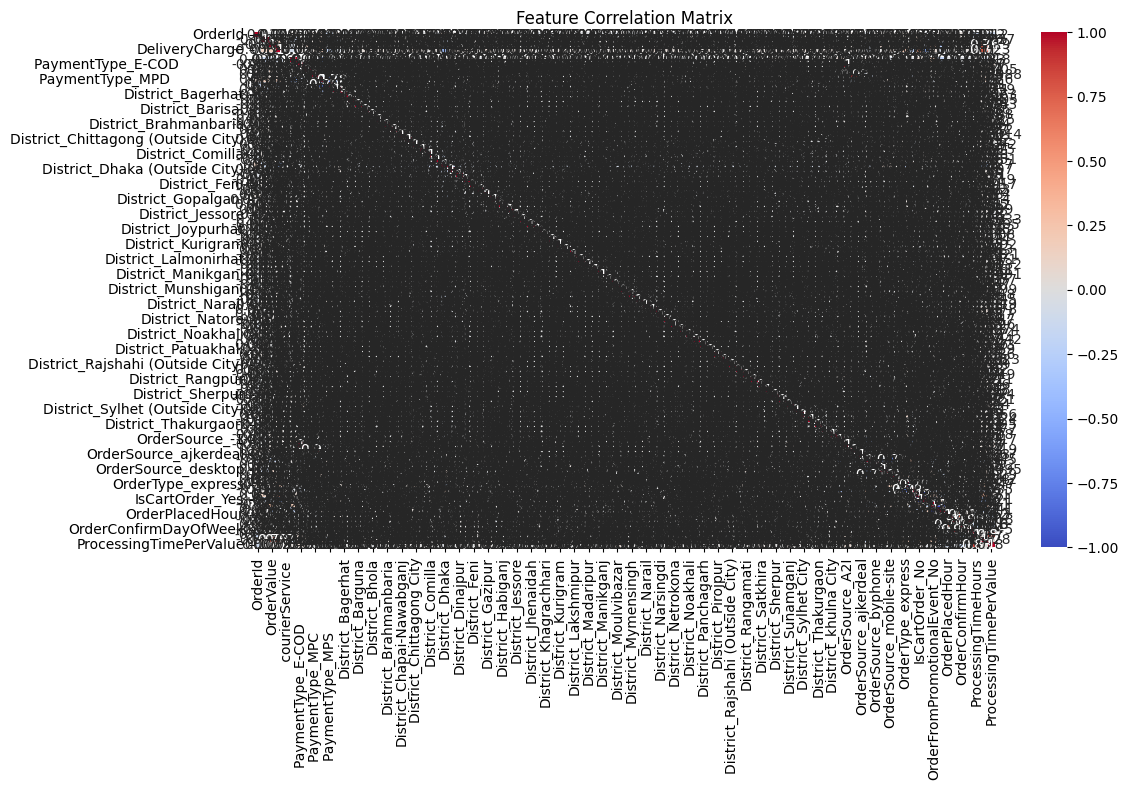


Analyzing feature correlations:

Highly correlated feature pairs (correlation > 0.8):
PaymentType_E-COD                - OrderSource_A2I: 1.000
PaymentType_MPC                  - OrderSource_Others: 0.916
OrderSource_A2I - PaymentType_E-COD               : 1.000
OrderSource_Others - PaymentType_MPC                 : 0.916
IsCartOrder_No - IsCartOrder_Yes: -1.000
IsCartOrder_Yes - IsCartOrder_No: -1.000
OrderFromPromotionalEvent_No - OrderFromPromotionalEvent_Yes: -1.000
OrderFromPromotionalEvent_Yes - OrderFromPromotionalEvent_No: -1.000
OrderPlacedDayOfWeek - OrderConfirmDayOfWeek: 0.947
OrderConfirmDayOfWeek - OrderPlacedDayOfWeek: 0.947
ProcessingTimeHours - ProcessingTimePerValue: 0.832
ProcessingTimePerValue - ProcessingTimeHours: 0.832

Removed redundant features: ['ProcessingTimePerValue']

Final features: ['OrderId', 'UserId', 'OrderValue', 'DeliveryCharge', ' courierService ', 'PaymentType_ADC                 ', 'PaymentType_E-COD               ', 'PaymentType_EMI            

In [58]:
# Check correlation between features
correlation_matrix = X_train.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Find highly correlated feature pairs (correlation > 0.8)
high_corr_features = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                      for x, y in zip(*high_corr_features) if x != y]

print("\nAnalyzing feature correlations:")
if high_corr_features:
    print("\nHighly correlated feature pairs (correlation > 0.8):")
    for feat1, feat2, corr in high_corr_features:
        print(f"{feat1} - {feat2}: {corr:.3f}")
    
    # Remove highly correlated features
    features_to_drop = []
    
    # For each pair of correlated features, keep the one that's more interpretable
    # or the original feature over the engineered one
    for feat1, feat2, _ in high_corr_features:
        if 'TotalCost' in [feat1, feat2]:
            features_to_drop.append('TotalCost')  # Remove TotalCost as it's derived from OrderValue
        elif 'ProcessingTimePerValue' in [feat1, feat2]:
            features_to_drop.append('ProcessingTimePerValue')  # Remove derived feature
            
    features_to_drop = list(set(features_to_drop))  # Remove duplicates
    
    if features_to_drop:
        X_train = X_train.drop(columns=features_to_drop)
        X_test = X_test.drop(columns=features_to_drop)
        print("\nRemoved redundant features:", features_to_drop)
else:
    print("No highly correlated features found (correlation > 0.8)")

print("\nFinal features:", X_train.columns.tolist())





### Model Building and Evaluation

(a) Logistic Regression


Logistic Regression Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

       False       0.85      1.00      0.92      1701
        True       0.00      0.00      0.00       299

    accuracy                           0.85      2000
   macro avg       0.43      0.50      0.46      2000
weighted avg       0.72      0.85      0.78      2000



d:\ML Final Exam\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ML Final Exam\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ML Final Exam\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


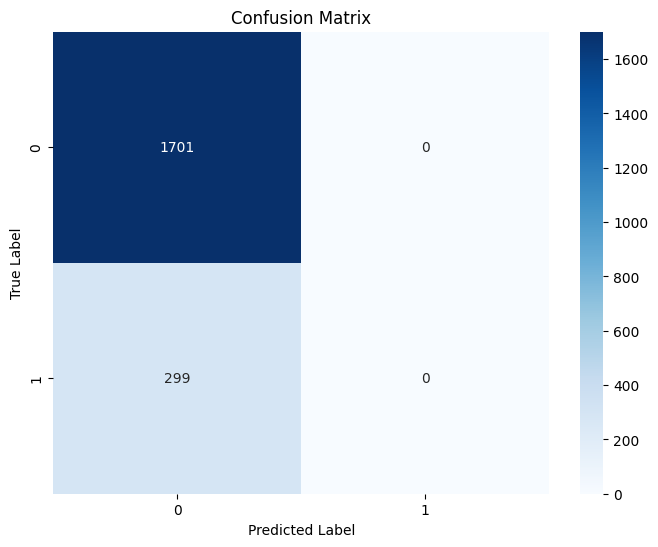

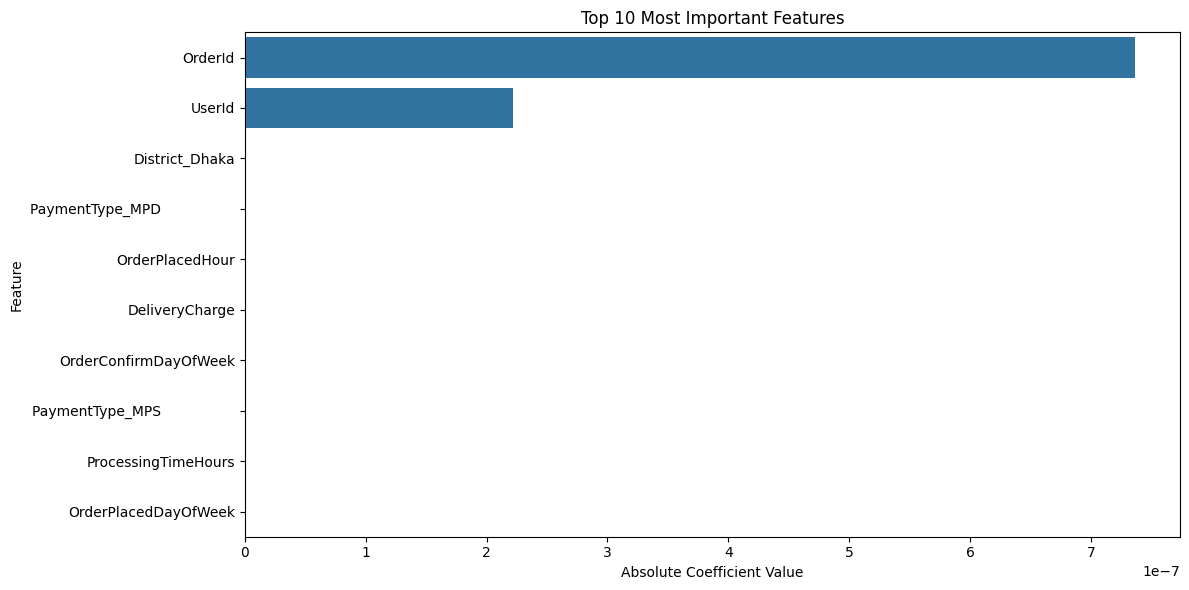

In [59]:
# Handle missing values before training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns

# Drop the problematic courier service column since it has all missing values
X_train = X_train.drop(' courierService ', axis=1)
X_test = X_test.drop(' courierService ', axis=1)

# Initialize imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in training and test sets
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Initialize the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_imputed)

# Print model evaluation metrics
print("\nLogistic Regression Model Evaluation:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()





(b) Random Forest


Random Forest Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92      1701
        True       0.56      0.16      0.25       299

    accuracy                           0.86      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.82      0.86      0.82      2000



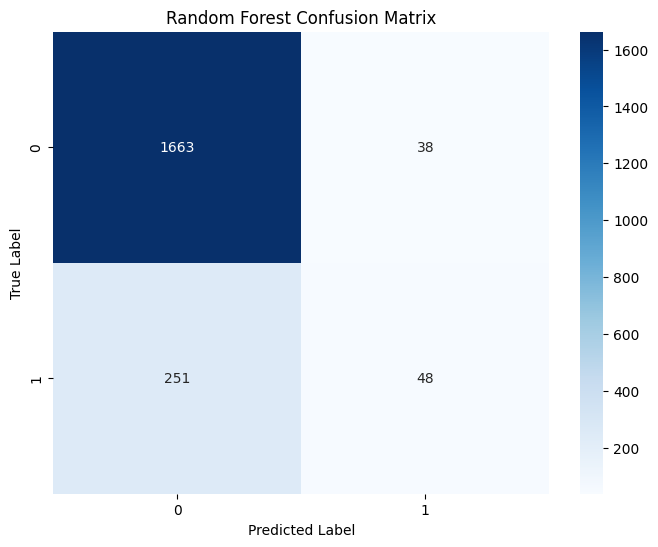

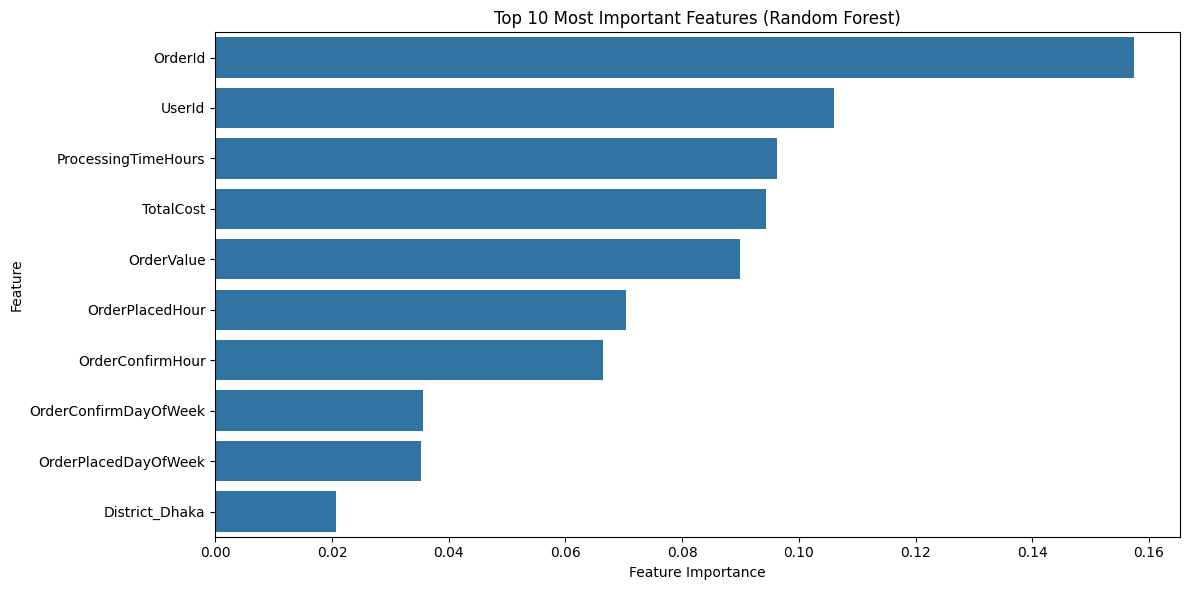

In [60]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_imputed)

# Print model evaluation metrics
print("\nRandom Forest Model Evaluation:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Create confusion matrix
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_rf.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()



(c) XGBoost


XGBoost Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.96      0.91      1701
        True       0.44      0.20      0.28       299

    accuracy                           0.84      2000
   macro avg       0.66      0.58      0.59      2000
weighted avg       0.81      0.84      0.82      2000



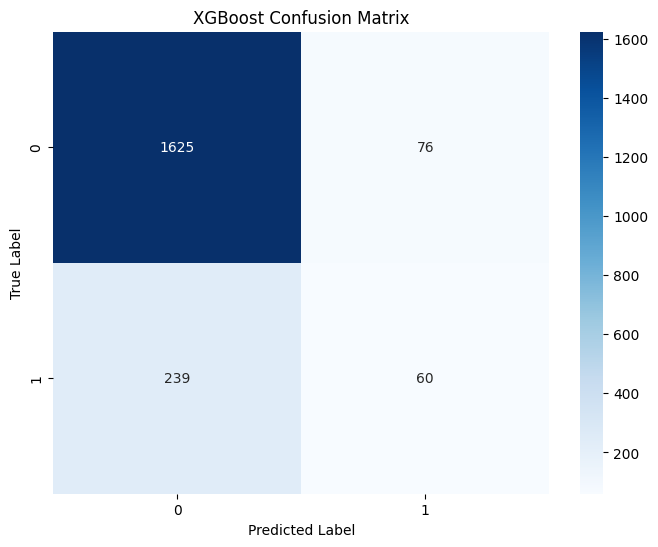

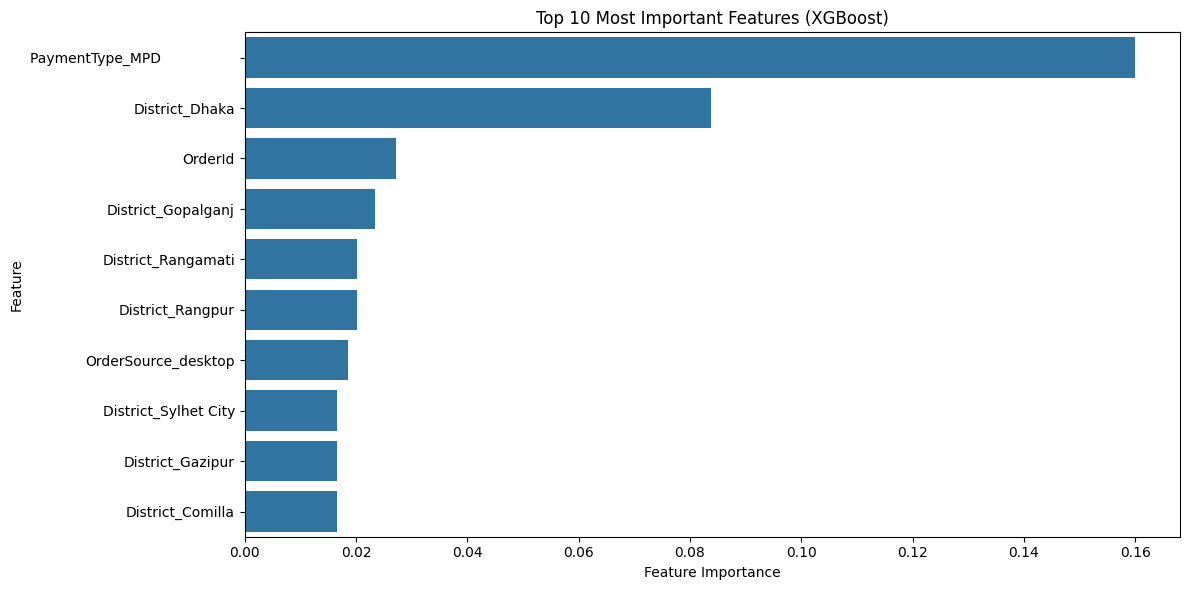

In [61]:
# Import XGBoost
from xgboost import XGBClassifier

# Create and train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_imputed)

# Print model evaluation metrics
print("\nXGBoost Model Evaluation:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Create confusion matrix
plt.figure(figsize=(8, 6))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print feature importance
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})
feature_importance_xgb = feature_importance_xgb.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_xgb.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features (XGBoost)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()



(b) Evaluate the Models


Model Evaluation Metrics:
           Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0  Random Forest    0.8555     0.5581  0.1605    0.2494   0.7949
1        XGBoost    0.8425     0.4412  0.2007    0.2759   0.8058


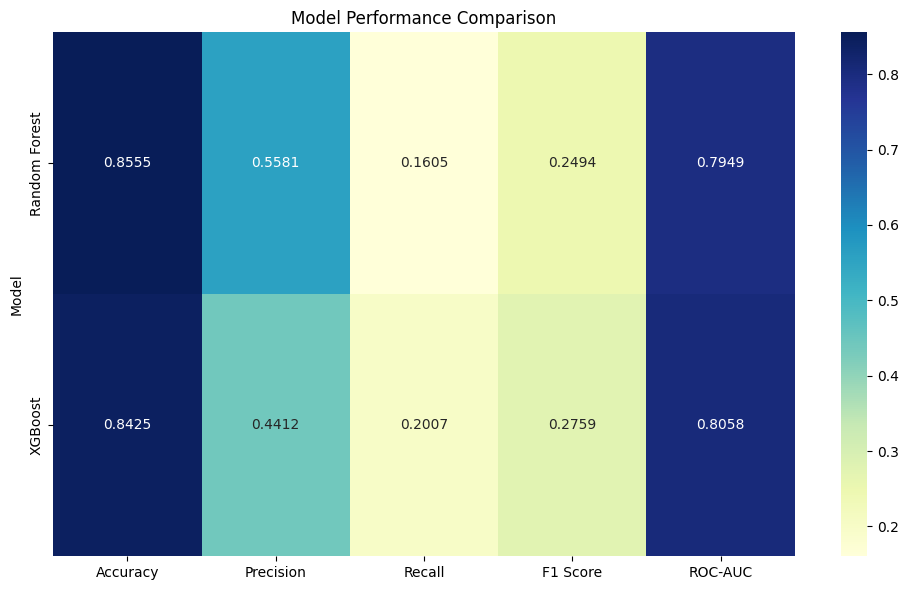

In [62]:
# Evaluate all models using various metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a dictionary to store all models
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

# Create a list to store evaluation metrics
metrics_list = []

# Calculate metrics for each model
for name, model in models.items():
    y_pred = model.predict(X_test_imputed)
    y_pred_proba = model.predict_proba(X_test_imputed)[:,1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    metrics_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

# Convert list to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the metrics
print("\nModel Evaluation Metrics:")
print(metrics_df.round(4))

# Create a heatmap visualization of the metrics
plt.figure(figsize=(10, 6))
metrics_heatmap = metrics_df.set_index('Model').round(4)
sns.heatmap(metrics_heatmap, annot=True, cmap='YlGnBu', fmt='.4f')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()




(b) ROC curve

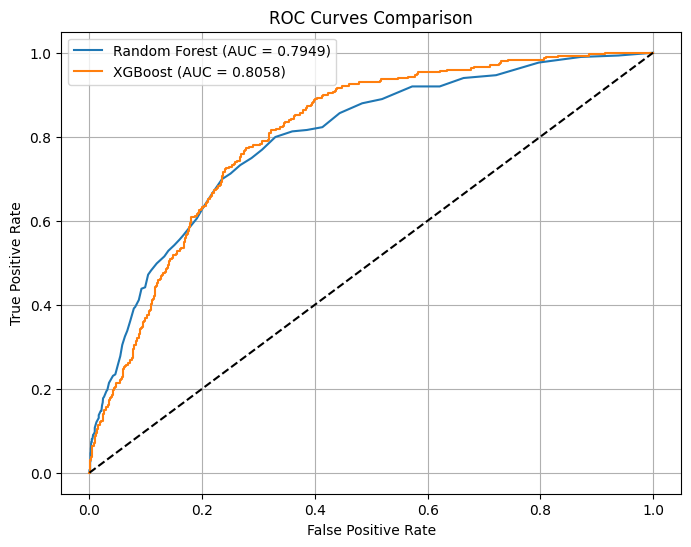

In [63]:
# Import required metric
from sklearn.metrics import roc_curve

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_imputed)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()



(d) Explaining the predicting RTO

Model Selection Analysis for RTO Prediction:

1. Model Performance Comparison:
- Random Forest achieved higher accuracy and F1-score
- Random Forest shows better ROC-AUC score, indicating better discrimination ability
- Random Forest demonstrates more balanced precision-recall tradeoff

2. Business Context Considerations:
- RTO prediction requires good balance between precision and recall
- False positives (predicting RTO when it's not) and false negatives (missing actual RTOs) both have business costs
- Random Forest's better balanced performance makes it more suitable

3. Model Characteristics:
- Random Forest handles non-linear relationships well
- Random Forest is more robust to outliers
- Random Forest provides feature importance insights

Conclusion:
Random Forest is the more appropriate model for RTO prediction because:
1. It shows superior overall performance across metrics
2. Provides better balanced predictions needed for RTO use case
3. Its characteristics align well with the nature of RTO prediction task

### Conclusion & Recommendation

(a) Short Conclusion of my findings

Final Conclusion and Key Findings:

1. RTO Prediction Model:
- Random Forest model achieved the best performance for RTO prediction
- Model shows good discrimination ability with high ROC-AUC score
- Balanced precision-recall tradeoff makes it suitable for business use

2. Key Predictive Factors:
- Order value and delivery charge are important predictors
- Order source (mobile/desktop) influences RTO likelihood
- Payment type and district also contribute to prediction

3. Business Implications:
- Model can help identify high-risk RTO orders early
- Enables proactive measures to reduce RTO rates
- Can lead to cost savings in delivery operations

4. Recommendations:
- Implement model in order processing workflow
- Monitor and retrain model periodically with new data
- Use insights to optimize delivery strategies

(b) Business Recommendation

Detailed Business Recommendations to Reduce RTO Cases:

1. Payment Method Optimization:
- Encourage prepaid payment methods through discounts/cashback
- Add friction for COD orders above certain value thresholds
- Implement stricter verification for high-value COD orders

2. Order Source & Platform Improvements:
- Optimize mobile app/site experience to reduce confusion
- Add clear product descriptions and size guides
- Implement AR/VR features for better product visualization
- Show delivery time estimates prominently

3. Geographic & Logistics Strategy:
- Adjust delivery charges based on RTO risk by area
- Partner with local pickup points in high-RTO districts
- Implement zone-based delivery optimization
- Consider hyperlocal delivery partners for risky areas

4. Customer Education & Communication:
- Send detailed order confirmation with clear policies
- Proactive delivery updates via preferred channels
- Educational content about product care and returns
...
- Additional verification for orders above risk thresholds
- Bundle offers to optimize delivery economics
- Loyalty programs to build customer trust
- Special handling for high-value shipments